<a href="https://colab.research.google.com/github/2loopoff/MLHomeworks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%B5%D1%87%D0%BA%D0%B0_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

(Titanic data again)

Build a model with `sklearn`'s `LogisticRegression` or `SVC` to get the accuracy of at least 0.81 on the test set. Can you get higher? 0.84?

Some (optional) suggestions:
- Add new features (e.g. missing value indicator columns)
- Fill missing values
- Encode categorical features (e.g. one-hot encoding)
- Scale the features (e.g. with standard or robust scaler)
- Think of other ways of preprocessing the features (e.g. `Fare` $\to$ `log(Fare)`)
- Try adding polynomial features
- use `sklearn.model_selection.GridSearchCV` to search for the best hyperparameters (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)



In [2]:
!wget https://github.com/HSE-LAMBDA/MLDM-2020/raw/master/day-01/train.csv

--2020-10-18 17:42:45--  https://github.com/HSE-LAMBDA/MLDM-2020/raw/master/day-01/train.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2020/master/day-01/train.csv [following]
--2020-10-18 17:42:45--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2020/master/day-01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.03s   

2020-10-18 17:42:45 (2.17 MB/s) - ‘train.csv’ saved [60302/60302]



In [3]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
print(type(data['Sex']));print(type(data))
# print(data.)

def sex_sort(sex):
  if    sex == 'male':    return 1
  elif  sex == 'female':  return -1
  else: return 0

print(data['Sex'].apply(sex_sort )[:3] )
print(data['Sex'][:3] )

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
PassengerId
1    1
2   -1
3   -1
Name: Sex, dtype: int64
PassengerId
1      male
2    female
3    female
Name: Sex, dtype: object


In [37]:
sex_sort('fmale')

0

#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

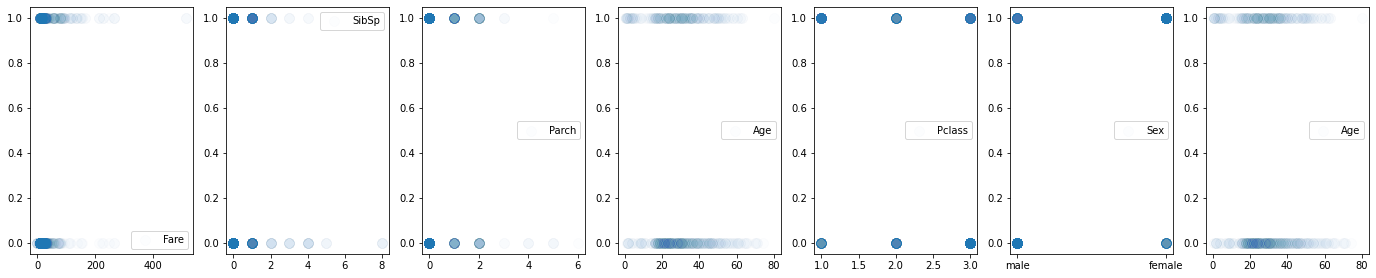

In [63]:
columns = ("Fare", "SibSp", "Parch", "Age", "Pclass", "Sex", "Age")

plt.figure(figsize=(24, 10))
for i, c in enumerate(columns, 1):
  plt.subplot(2, len(columns), i)
  plt.scatter(data[c], data['Survived'], label=c,alpha=0.01,s=100)
  # plt.scatter(dataset[c], model.predict(X_subset), label='prediction')
  plt.legend()

In [65]:
features = data.drop('Survived', axis=1)[np.array(columns)].copy()
# print(features.loc[4])

Fare        53.1
SibSp          1
Parch          0
Age           35
Pclass         1
Sex       female
Age           35
Name: 4, dtype: object


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  features = dataset[list(columns)].copy()
  features["Age"] = dataset.Age.fillna(dataset.Age.median())
  features["Sex"] = dataset.Sex.apply(sex_sort )
  features['Embarked'] = data.Embarked.fillna('unknown')

  return features

model = make_pipeline(
    # <YOUR CODE>
    # E.g.
    make_column_transformer(
        (OneHotEncoder(sparse=False), ['Embarked']),
        remainder='passthrough'
    ),
    LogisticRegression()
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train, data_test = train_test_split(data, test_size=200, random_state=42)

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

train_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    )
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)

print("Train accuracy:", accuracy_score(
    data_train['Survived'],
    train_predictions
))
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Train accuracy: 0.7988422575976846
Test accuracy: 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
